# Модели преобразования изображения в текст

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://huggingface.co/nlpconnect/vit-gpt2-image-captioning
* https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#transformers.ImageToTextPipeline
* https://huggingface.co/vikhyatk/moondream2
* https://huggingface.co/docs/transformers/generation_strategies
* https://huggingface.co/docs/transformers/tasks/object_detection
* https://huggingface.co/docs/huggingface_hub/guides/inference
* https://huggingface.co/settings/tokens

## Задачи для совместного разбора

In [7]:
from transformers import pipeline
from PIL import Image

1\. Рассмотрите пример работы [модели](https://huggingface.co/nlpconnect/vit-gpt2-image-captioning) для решения задачи генерации текста.

In [6]:
checkpoint = "nlpconnect/vit-gpt2-image-captioning"
image_to_text = pipeline(
    "image-to-text",
    model=checkpoint
)

config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


In [8]:
image = Image.open("cat_hand.jfif")

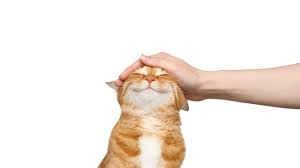

In [11]:
image

In [10]:
image_to_text(image)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1178: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


[{'generated_text': 'a person holding a cat in their hand '}]

In [18]:
image = Image.open("cat.jpg")
image_to_text(image)

[{'generated_text': 'a cat is walking through the grass '}]

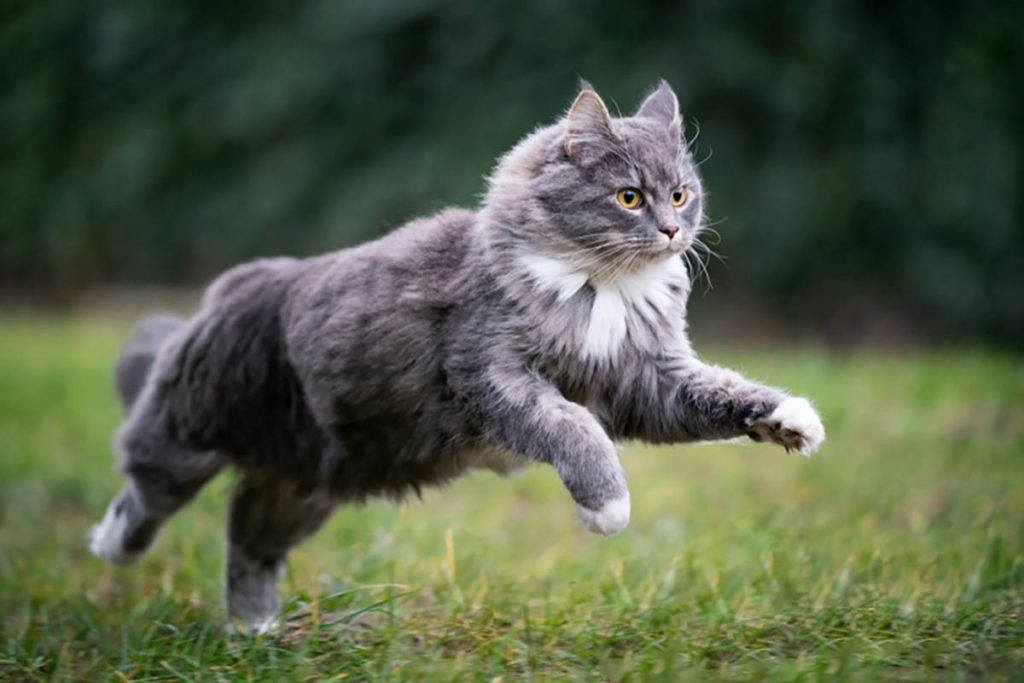

In [13]:
image

2\. Опишите функции `get_fur_color` и `get_breed`, которые являются заглушками для моделей классификации. Создайте шаблон промпта для работы с большой языковой моделью. Используя шаблон, сгенерированный текст и результаты работы заглушек, создайте промпт и передайте его в модель `gpt2`.

In [14]:
import random

def get_fur_color(cat_img: Image) -> str:
    return random.choice(["brown", "black", "white"])

def get_breed(cat_img: Image) -> str:
    return random.choice(["abussinian", "bengal", "persian"])

In [15]:
generator = pipeline('text-generation', model='gpt2')

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [16]:
generator(
    "Hello, I'm a language model,",
    max_length=30,
    num_return_sequences=5
)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': "Hello, I'm a language model, because of the role of the language model in design. To give an example the number of people in my field"},
 {'generated_text': "Hello, I'm a language model, it doesn't mean that you can write a compiler for it, but you already know how the language should look"},
 {'generated_text': "Hello, I'm a language model, of course. Not only do I want the syntax, I want the logic and the syntax and the logic."},
 {'generated_text': 'Hello, I\'m a language model, I write languages." He says that one important point I think is important to get across there.\n\n"'},
 {'generated_text': "Hello, I'm a language model, you're reading my books.\n\nTo clarify, in this situation, the original author did not write the"}]

In [19]:
prompt = """
Act like a cat expert.
Make the text longer by putting additional information about fur and breed.

Text: {text}
Cat's fur color: {fur}
Cat's breed: {breed}
Longer text including additional information:
"""

In [21]:
image = Image.open("cat.jpg")
generated_text = image_to_text(image)[0]["generated_text"]
fur = get_fur_color(image)
breed = get_breed(image)

concrete_prompt = prompt.format(
    text=generated_text,
    fur=fur,
    breed=breed
)

In [22]:
print(concrete_prompt)


Act like a cat expert. 
Make the text longer by putting additional information about fur and breed.

Text: a cat is walking through the grass 
Cat's fur color: black
Cat's breed: abussinian
Longer text including additional information: 



In [25]:
print(
    generator(
        concrete_prompt,
        max_length=100,
        num_return_sequences=1
    )[0]["generated_text"]
)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.



Act like a cat expert. 
Make the text longer by putting additional information about fur and breed.

Text: a cat is walking through the grass 
Cat's fur color: black
Cat's breed: abussinian
Longer text including additional information: 

Feline Breed: Belly to leg ratio.

Dogs: Female breeds: peregrine

Male breeds: albino

Male dogs: female fars




3\. Рассмотрите пример использования `InferenceClient` для работы с крупной моделью `Mistral`. Сравните результаты работы с `gpt2`.

In [26]:
from huggingface_hub import InferenceClient

In [27]:
import json
with open("hf-key.json") as fp:
  key_data = json.load(fp)

In [31]:
checkpoint = "mistralai/Mistral-7B-v0.1"
api_token = key_data["key"]

In [32]:
client = InferenceClient(token=api_token, model=checkpoint)

In [33]:
r = client.text_generation(
    concrete_prompt,
    max_new_tokens=40,
    return_full_text=False
)

In [37]:
r.strip()

"The cat is walking through the grass. The cat's fur is black. The cat's breed is abussinian."

## Задачи для самостоятельного решения

1\. Используя [модель](https://huggingface.co/vikhyatk/moondream2) для ответа на вопрос по изображению, получите описание любой картинки, а также ответы на несколько более специфичных вопросов.

2\. Загрузите датасет `cppe-5` и модель `"facebook/detr-resnet-50"` (или ее дообученную версию с предыдущей недели). Загрузите любую подходящую модель для генерации текста по изображению.

Объединив результаты работы двух этих моделей, сгенерируйте уточненное текстовое описание изображения с учетом информации, полученной при помощи модели для распознавания объектов. В качестве такой информации может выступать:
- количество людей на изображении
- информация об их руках/лицах
- количество пересечений bounding box и т.д.

3\. Используя результаты, полученные в процессе прохождения курса (собственный датасет, модель распознавания объектов для этого датасета и другие артефакты), сгенерируйте текст для изображений из датасета, расширенный за счет результатов работы ваших моделей (классификация, распознавание объектов и т.д.)